## TIỀN XỬ LÝ

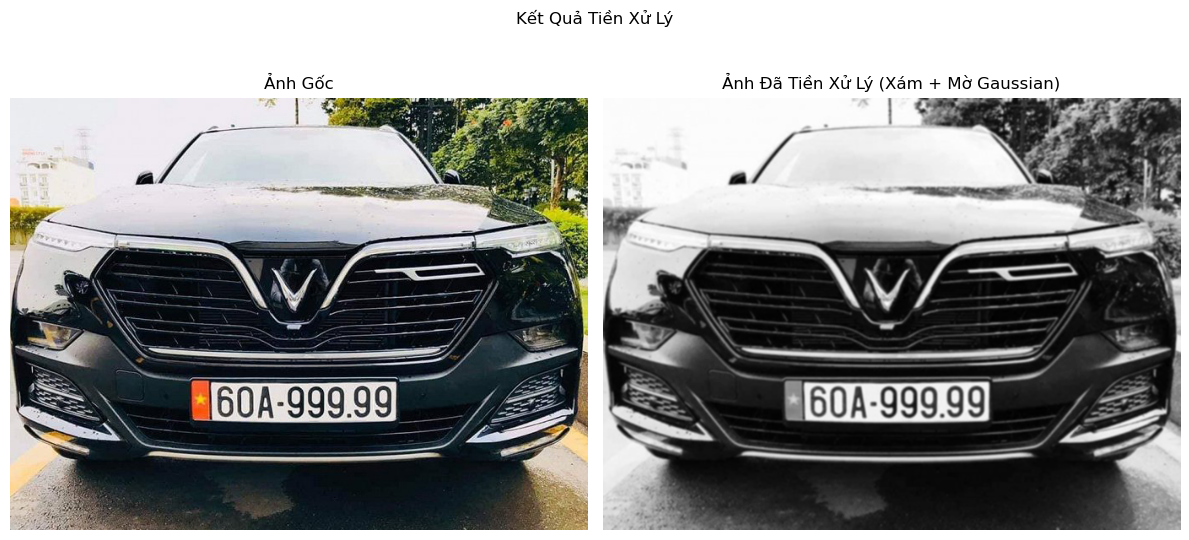

Đã hoàn thành bước tiền xử lý.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tien_xu_ly(image):
    # Chuyển ảnh sang ảnh xám (Grayscale)
    # Kiểm tra xem ảnh có phải là ảnh màu (3 kênh) không
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Làm mờ ảnh bằng bộ lọc Gaussian để giảm nhiễu
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    return blurred_image


if __name__ == "__main__":
    try:
        image = cv2.imread("bien_so_xe.jpg")
        if image is None:
            print(f"Lỗi: Không thể tải ảnh 'bien_so_xe.jpg'.")
            print("Vui lòng kiểm tra lại đường dẫn và đảm bảo tệp ảnh tồn tại.")
        else:
            # Gọi hàm tiền xử lý
            processed_image = tien_xu_ly(image)

            # Hiển thị kết quả bằng Matplotlib
            plt.figure(figsize=(12, 6))

            # Hiển thị ảnh gốc
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Ảnh Gốc")
            plt.axis('off')

            # Hiển thị ảnh đã xử lý
            plt.subplot(1, 2, 2)
            plt.imshow(processed_image, cmap='gray')
            plt.title("Ảnh Đã Tiền Xử Lý (Xám + Mờ Gaussian)")
            plt.axis('off')

            plt.suptitle("Kết Quả Tiền Xử Lý")
            plt.tight_layout()
            plt.show()
            
            print("Đã hoàn thành bước tiền xử lý.")

    except ImportError:
        print("\n--- LỖI ---")
        print("Vui lòng cài đặt các thư viện cần thiết:")
        print("pip install opencv-python")
        print("pip install matplotlib")
    except Exception as e:
        print(f"\nĐã xảy ra lỗi: {e}")
        print("Hãy đảm bảo bạn có tệp ảnh hoặc các thư viện đã được cài đặt đúng.")

### Trích xuất đặc trưng - PHÁT HIỆN CẠNH

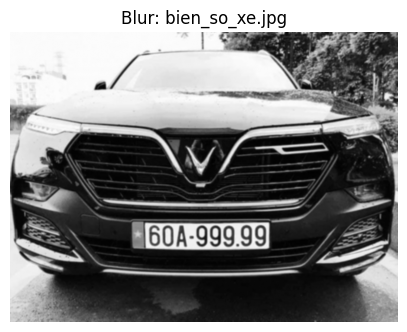

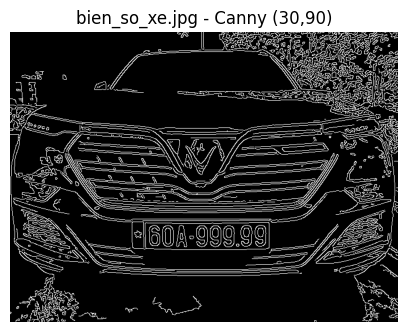

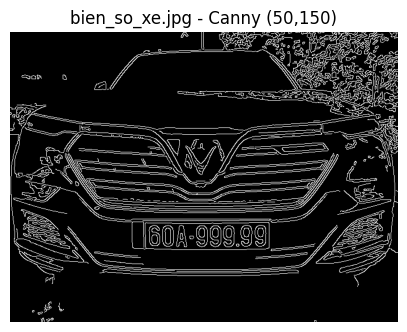

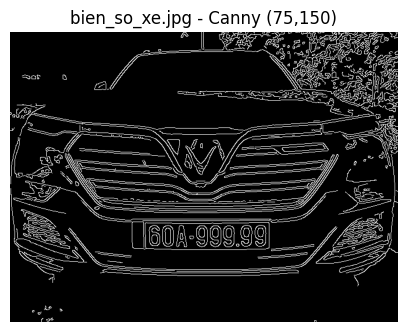

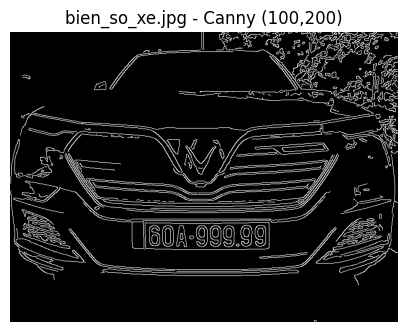

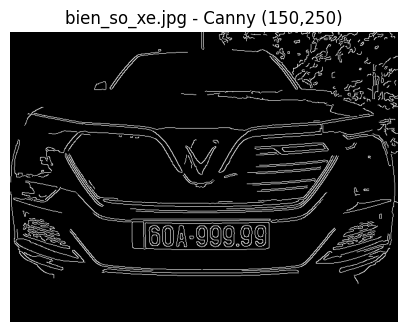

Đã lưu:
 - \bien_so_xe_edges_30_90.png
 - \bien_so_xe_edges_50_150.png
 - \bien_so_xe_edges_75_150.png
 - \bien_so_xe_edges_100_200.png
 - \bien_so_xe_edges_150_250.png


In [7]:
def phat_hien_canh_canny(path_img, pairs=None, save_dir="/"): # muốn tải ảnh xóa "/"
    import cv2, numpy as np
    import matplotlib.pyplot as plt
    from pathlib import Path

    if pairs is None:
        pairs = [(30,90),(50,150),(75,150),(100,200),(150,250)]

    # đọc & đảm bảo xám + làm mờ
    img = cv2.imread(path_img, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise FileNotFoundError(f"Không tìm thấy ảnh: {path_img}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if (len(img.shape)==3 and img.shape[2]==3) else img
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # hiển thị ảnh mờ tham chiếu
    plt.figure(figsize=(5,4)); plt.imshow(blur, cmap='gray'); plt.title(f"Blur: {Path(path_img).name}"); plt.axis('off'); plt.show()

    # chạy các cặp ngưỡng
    save_dir = Path(save_dir); save_dir.mkdir(parents=True, exist_ok=True)
    outs = []
    for t1, t2 in pairs:
        edges = cv2.Canny(blur, t1, t2, apertureSize=3, L2gradient=True)
        out = save_dir / f"{Path(path_img).stem}_edges_{t1}_{t2}.png"
        cv2.imwrite(str(out), edges)
        outs.append(str(out))
        plt.figure(figsize=(5,4)); plt.imshow(edges, cmap='gray'); plt.title(f"{Path(path_img).name} - Canny ({t1},{t2})"); plt.axis('off'); plt.show()
    print("Đã lưu:", *outs, sep="\n - ")

# Ví dụ:
phat_hien_canh_canny("bien_so_xe.jpg")


## Trích xuất đặc trưng - XỬ LÝ HÌNH THÁI

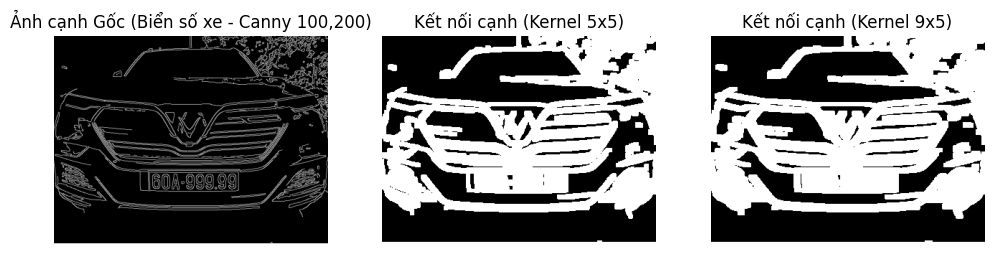

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def ket_noi_canh(edge_img, kernel_size=(9,5), shape='rect', 
                 do_close=True, do_dilate=False, iterations=1):

    if edge_img is None:
        raise ValueError("Ảnh đầu vào rỗng hoặc không đọc được!")

    # Chuyển về nhị phân 0/255 (đảm bảo dạng chuẩn)
    if len(edge_img.shape) == 3:
        gray = cv2.cvtColor(edge_img, cv2.COLOR_BGR2GRAY)
    else:
        gray = edge_img.copy()
    binary = np.where(gray > 0, 255, 0).astype('uint8')

    # Tạo kernel theo lựa chọn
    if shape == 'rect':
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    elif shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    elif shape == 'cross':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)
    else:
        raise ValueError("shape phải là 'rect', 'ellipse' hoặc 'cross'!")

    # Áp dụng phép đóng (closing = dilate → erode)
    result = binary.copy()
    if do_close:
        result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    
    # (Tuỳ chọn) Giãn nở thêm nếu cần làm nổi vùng
    if do_dilate:
        result = cv2.dilate(result, kernel, iterations=iterations)
    
    # Chuẩn hóa đầu ra về 0/255
    result = np.where(result > 0, 255, 0).astype('uint8')
    return result

# Đọc ảnh cạnh (chỉ đọc ảnh biển số)
edge_bien = cv2.imread('bien_so_xe - Canny (100,200).png', cv2.IMREAD_GRAYSCALE)

# ======= THỬ NGHIỆM 2 KERNEL KHÁC NHAU CHO ẢNH BIỂN SỐ =======

# Kernel (5,5)
connected_bien_55 = ket_noi_canh(edge_bien, kernel_size=(5,5), shape='rect', do_close=True, do_dilate=True)

# Kernel (9,5)
connected_bien_95 = ket_noi_canh(edge_bien, kernel_size=(9,5), shape='rect', do_close=True, do_dilate=True)

# ======= HIỂN THỊ SO SÁNH (CHỈ ẢNH BIỂN SỐ XE) =======
plt.figure(figsize=(12, 4)) # Điều chỉnh kích thước cho 1 hàng 3 cột

# --- ẢNH BIỂN SỐ XE ---
plt.subplot(1,3,1)
plt.title("Ảnh cạnh Gốc (Biển số xe - Canny 100,200)")
plt.imshow(edge_bien, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Kết nối cạnh (Kernel 5x5)")
# Sửa lỗi: Hiển thị connected_bien_55 (thay vì connected_grey_55 như code gốc)
plt.imshow(connected_bien_55, cmap='gray') 
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Kết nối cạnh (Kernel 9x5)")
plt.imshow(connected_bien_95, cmap='gray')
plt.axis('off')

plt.show()

## TÌM ĐƯỜNG VIỀN

Ảnh: bien_so_xe - Canny (100,200).png | Số contours: 983


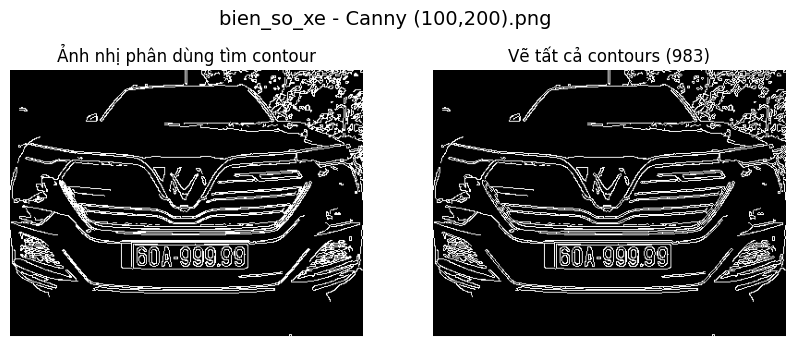

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def tim_ung_cu_vien(anh_nhi_phan: np.ndarray):
    # Bảo đảm 1 kênh
    if len(anh_nhi_phan.shape) == 3:
        gray = cv2.cvtColor(anh_nhi_phan, cv2.COLOR_BGR2GRAY)
    else:
        gray = anh_nhi_phan.copy()
    # Nhị phân 0/255
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # Tìm contours (tương thích OpenCV 3/4)
    found = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = found[1] if len(found) == 3 else found[0]
    return contours, binary

def ve_tat_ca_contours(contours, shape, thickness=1):
    h, w = shape[:2]
    canvas = np.zeros((h, w), dtype=np.uint8)
    cv2.drawContours(canvas, contours, -1, 255, thickness)
    return canvas

# --- Thử nghiệm và IN RA MÀN HÌNH ---
paths = [
    "bien_so_xe - Canny (100,200).png",
]

for p in paths:
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    contours, binary = tim_ung_cu_vien(img)
    canvas = ve_tat_ca_contours(contours, binary.shape, thickness=1)

    print(f"Ảnh: {Path(p).name} | Số contours: {len(contours)}")

    plt.figure(figsize=(10,4))
    plt.suptitle(Path(p).name, fontsize=14)
    plt.subplot(1,2,1); plt.title("Ảnh nhị phân dùng tìm contour")
    plt.imshow(binary, cmap='gray'); plt.axis('off')
    plt.subplot(1,2,2); plt.title(f"Vẽ tất cả contours ({len(contours)})")
    plt.imshow(canvas, cmap='gray'); plt.axis('off')
    plt.show()


## LỌC THEO DIỆN TÍCH


 Ảnh: bien_so_xe - Canny (100,200)
Tổng contours tìm được: 983
Gợi ý min_area: 110 | max_area: 22156
Contours sau lọc: 50


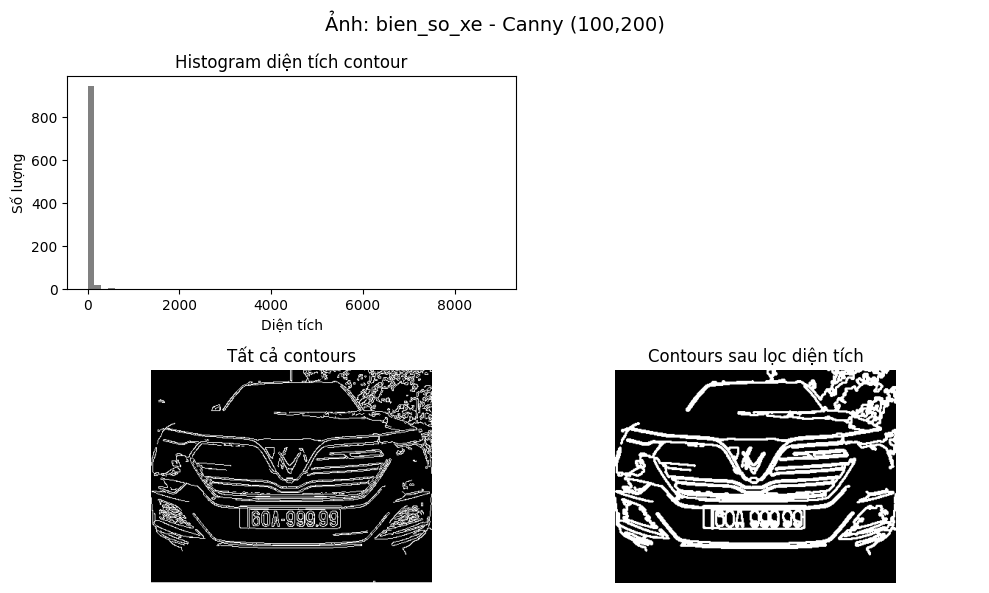

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===== HÀM LỌC THEO DIỆN TÍCH =====
def loc_theo_dien_tich(contours, min_area=1000, max_area=20000):
    ung_cu_vien_hop_le = []
    for cnt in contours:
        dien_tich = cv2.contourArea(cnt)
        if dien_tich > min_area and dien_tich < max_area:
            ung_cu_vien_hop_le.append(cnt)
    return ung_cu_vien_hop_le


# ===== HÀM LẤY CONTOURS TỪ ẢNH CẠNH =====
def get_contours_from_edge(edge_img):
    if edge_img is None:
        return [], None
    if len(edge_img.shape) == 3:
        gray = cv2.cvtColor(edge_img, cv2.COLOR_BGR2GRAY)
    else:
        gray = edge_img.copy()
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    found = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = found[0] if len(found) == 2 else found[1]
    return contours, binary


# ===== XỬ LÝ ẢNH VÀ HIỂN THỊ =====
def xu_ly_anh(edge_path, ten_anh):
    edge = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)
    contours, binary = get_contours_from_edge(edge)
    print(f"\n Ảnh: {ten_anh}")
    print("Tổng contours tìm được:", len(contours))

    # Gợi ý ngưỡng diện tích
    H, W = binary.shape
    areas = [cv2.contourArea(c) for c in contours]
    min_area = int(0.001 * W * H)
    max_area = int(0.2 * W * H)
    print("Gợi ý min_area:", min_area, "| max_area:", max_area)

    filtered = loc_theo_dien_tich(contours, min_area=min_area, max_area=max_area)
    print("Contours sau lọc:", len(filtered))

    # Tạo ảnh hiển thị
    canvas_all = np.zeros_like(binary)
    canvas_f = np.zeros_like(binary)
    cv2.drawContours(canvas_all, contours, -1, 255, 1)
    cv2.drawContours(canvas_f, filtered, -1, 255, 2)

    # ---- VẼ HISTOGRAM + CONTOUR ----
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    fig.suptitle(f"Ảnh: {ten_anh}", fontsize=14)

    # Histogram
    axes[0, 0].hist(areas, bins=60, color='gray')
    axes[0, 0].set_title("Histogram diện tích contour")
    axes[0, 0].set_xlabel("Diện tích")
    axes[0, 0].set_ylabel("Số lượng")

    axes[0, 1].axis("off")  # ô trống cho cân đối

    # Contours
    axes[1, 0].imshow(canvas_all, cmap='gray')
    axes[1, 0].set_title("Tất cả contours")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(canvas_f, cmap='gray')
    axes[1, 1].set_title("Contours sau lọc diện tích")
    axes[1, 1].axis("off")

    plt.tight_layout()
    plt.show()

    return canvas_all, canvas_f


# ===== CHẠY CHO 2 ẢNH =====
edge_path1 = "bien_so_xe - Canny (100,200).png"

canvas_all_1, canvas_f_1 = xu_ly_anh(edge_path1, "bien_so_xe - Canny (100,200)")

--- BẮT ĐẦU QUÁ TRÌNH LỌC CONTOUR ---

Ảnh: bien_so_xe - Canny (100,200)
Tổng contours tìm được ban đầu: 983
Ngưỡng diện tích (Min/Max): 553 / 22156
Contours sau lọc diện tích: 15
Contours sau lọc tỷ lệ (cuối cùng): 6


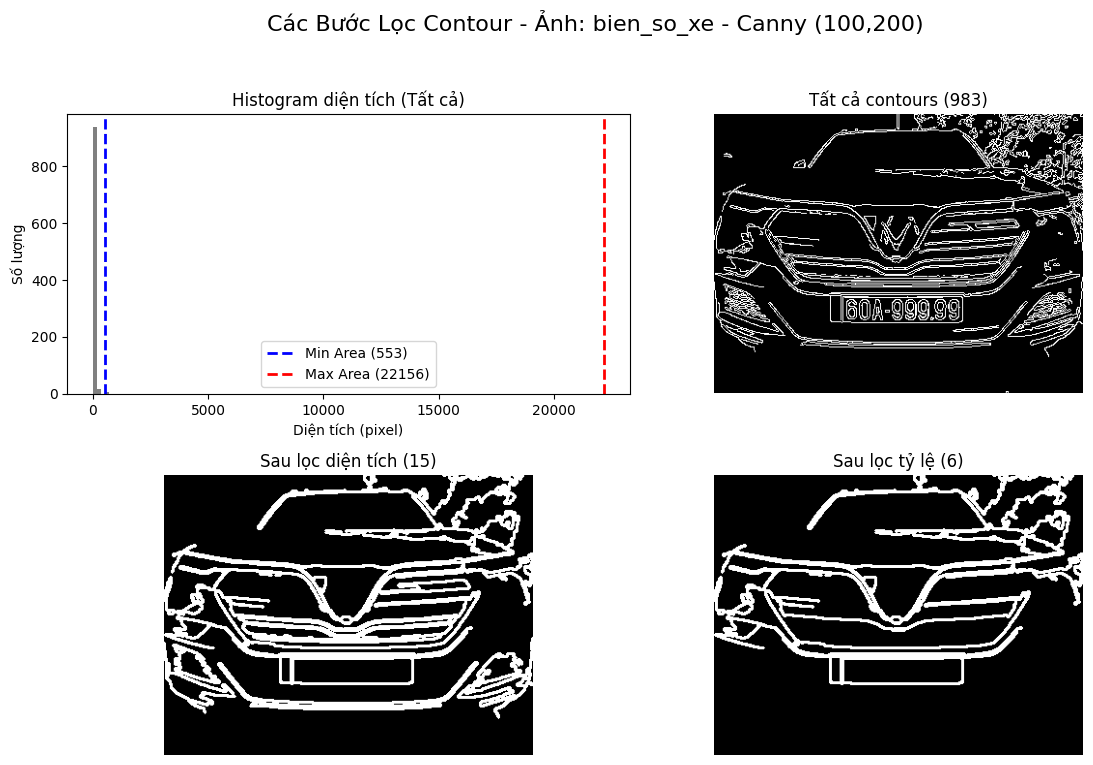

--- HOÀN THÀNH ---


In [14]:
# ==========================================================
# ===== HÀM LỌC THEO TỶ LỆ KHUNG HÌNH (ASPECT RATIO) =====
# ==========================================================
def loc_theo_ty_le_khung_hinh(contours, min_aspect_ratio_vuong=1.5, max_aspect_ratio_vuong=2.5,
                              min_aspect_ratio_dai=3.5, max_aspect_ratio_dai=5.0):
    """
    Lọc các contours dựa trên tỷ lệ khung hình (aspect ratio) của hình chữ nhật bao quanh.
    Chấp nhận hai khoảng tỷ lệ: một cho biển vuông/xe máy và một cho biển dài.
    
    Args:
        contours (list): Danh sách contours đã qua lọc diện tích.
        min_aspect_ratio_vuong (float): Tỷ lệ min cho biển vuông (w/h).
        max_aspect_ratio_vuong (float): Tỷ lệ max cho biển vuông (w/h).
        min_aspect_ratio_dai (float): Tỷ lệ min cho biển dài (w/h).
        max_aspect_ratio_dai (float): Tỷ lệ max cho biển dài (w/h).

    Returns:
        list: Danh sách các ứng cử viên cuối cùng.
    """
    ung_cu_vien_cuoi_cung = []
    
    # Duyệt qua từng contour đã được lọc sơ bộ
    for cnt in contours:
        # Tìm hình chữ nhật bao quanh contour
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Tránh lỗi chia cho 0 (nếu chiều cao h = 0)
        if h == 0:
            continue
            
        # Tính Tỷ lệ khung hình (Aspect Ratio)
        ty_le = float(w) / h
        
        # Kiểm tra điều kiện
        
        # Điều kiện 1: Biển xe máy/ô tô vuông (tỷ lệ ~2:1)
        la_bien_vuong = (ty_le > min_aspect_ratio_vuong and ty_le < max_aspect_ratio_vuong)
        
        # Điều kiện 2: Biển ô tô dài (tỷ lệ ~4.5:1)
        la_bien_dai = (ty_le > min_aspect_ratio_dai and ty_le < max_aspect_ratio_dai)
        
        # Nếu contour thỏa mãn một trong hai điều kiện
        if la_bien_vuong or la_bien_dai:
            ung_cu_vien_cuoi_cung.append(cnt)
            # (Optional) In ra để debug
            # print(f"  [ASPECT RATIO] Giữ lại: w={w}, h={h}, ratio={ty_le:.2f}")

    return ung_cu_vien_cuoi_cung


# ===== HÀM XỬ LÝ ẢNH (CẬP NHẬT ĐỂ GỌI CẢ 2 BỘ LỌC) =====
def xu_ly_anh(edge_path, ten_anh):
    """
    Hàm tổng hợp: đọc ảnh cạnh, tìm contours, lọc diện tích, 
    lọc tỷ lệ và hiển thị kết quả các bước.
    """
    edge = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)
    if edge is None:
        print(f"LỖI: Không thể đọc ảnh '{edge_path}'.")
        print("Hãy đảm bảo bạn đã chạy các bước Canny và Closing trước đó.")
        return None, None, None
        
    # Tìm contours ban đầu
    contours, binary = get_contours_from_edge(edge)
    print(f"\nẢnh: {ten_anh}")
    print(f"Tổng contours tìm được ban đầu: {len(contours)}")

    # Tính toán diện tích cho histogram và ngưỡng
    H, W = binary.shape
    areas = [cv2.contourArea(c) for c in contours if cv2.contourArea(c) > 0]
    
    # Gợi ý ngưỡng diện tích (tinh chỉnh dựa trên quan sát)
    min_area = int(0.005 * W * H) # ~0.5% diện tích ảnh
    max_area = int(0.2 * W * H)   # ~20% diện tích ảnh
    print(f"Ngưỡng diện tích (Min/Max): {min_area} / {max_area}")

    # BƯỚC 1: LỌC DIỆN TÍCH
    filtered_area = loc_theo_dien_tich(contours, min_area=min_area, max_area=max_area)
    print(f"Contours sau lọc diện tích: {len(filtered_area)}")

    # BƯỚC 2: LỌC TỶ LỆ KHUNG HÌNH (BƯỚC MỚI)
    # Áp dụng bộ lọc tỷ lệ cho các contours đã qua lọc diện tích
    # Tinh chỉnh: Nếu chỉ làm xe máy, có thể bỏ (min_dai, max_dai)
    final_candidates = loc_theo_ty_le_khung_hinh(
        filtered_area, 
        min_aspect_ratio_vuong=1.5, max_aspect_ratio_vuong=2.5,
        min_aspect_ratio_dai=3.5, max_aspect_ratio_dai=5.0
    )
    print(f"Contours sau lọc tỷ lệ (cuối cùng): {len(final_candidates)}")

    # --- Tạo ảnh để hiển thị các bước ---
    canvas_all = np.zeros_like(binary)
    canvas_area = np.zeros_like(binary)
    canvas_aspect = np.zeros_like(binary)
    
    cv2.drawContours(canvas_all, contours, -1, 255, 1)        # Tất cả contours (nét mỏng)
    cv2.drawContours(canvas_area, filtered_area, -1, 255, 2)  # Sau lọc diện tích (nét vừa)
    cv2.drawContours(canvas_aspect, final_candidates, -1, 255, 2) # Cuối cùng (nét đậm)

    # --- VẼ HISTOGRAM + 3 BƯỚC CONTOUR ---
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Các Bước Lọc Contour - Ảnh: {ten_anh}", fontsize=16)

    # Histogram diện tích
    if areas: # Chỉ vẽ nếu có
        axes[0, 0].hist(areas, bins=50, color='gray')
        axes[0, 0].set_title("Histogram diện tích (Tất cả)")
        axes[0, 0].set_xlabel("Diện tích (pixel)")
        axes[0, 0].set_ylabel("Số lượng")
        axes[0, 0].axvline(min_area, color='b', linestyle='--', linewidth=2, label=f'Min Area ({min_area})')
        axes[0, 0].axvline(max_area, color='r', linestyle='--', linewidth=2, label=f'Max Area ({max_area})')
        axes[0, 0].legend()
    else:
        axes[0, 0].set_title("Không có contour nào có diện tích")

    # Ảnh 1: Tất cả Contours
    axes[0, 1].imshow(canvas_all, cmap='gray')
    axes[0, 1].set_title(f"Tất cả contours ({len(contours)})")
    axes[0, 1].axis("off")

    # Ảnh 2: Sau lọc diện tích
    axes[1, 0].imshow(canvas_area, cmap='gray')
    axes[1, 0].set_title(f"Sau lọc diện tích ({len(filtered_area)})")
    axes[1, 0].axis("off")
    
    # Ảnh 3: Sau lọc tỷ lệ
    axes[1, 1].imshow(canvas_aspect, cmap='gray')
    axes[1, 1].set_title(f"Sau lọc tỷ lệ ({len(final_candidates)})")
    axes[1, 1].axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Chỉnh lề cho tiêu đề chung
    plt.show()

    return canvas_all, canvas_area, canvas_aspect

# ===== CHẠY THỰC NGHIỆM =====
if __name__ == "__main__":
    # Tên tệp ảnh cạnh (output từ bước Canny và Closing)
    # Đảm bảo tệp này tồn tại trong cùng thư mục
    edge_path1 = "bien_so_xe - Canny (100,200).png" 
    
    print("--- BẮT ĐẦU QUÁ TRÌNH LỌC CONTOUR ---")
    
    # Kiểm tra tệp
    if not Path(edge_path1).exists():
        print(f"LỖI: Không tìm thấy tệp '{edge_path1}'.")
        print("Vui lòng chạy các bước trước để tạo ra tệp này.")
    else:
        # Chạy hàm xử lý đã cập nhật
        xu_ly_anh(edge_path1, "bien_so_xe - Canny (100,200)")
        
    print("--- HOÀN THÀNH ---")

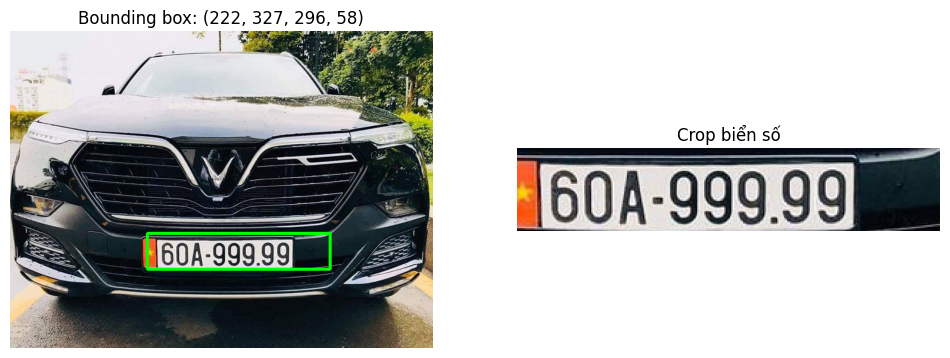

Toạ độ bbox (x, y, w, h): (222, 327, 296, 58)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ----------------- ĐƯỜNG DẪN ẢNH -----------------
path_color = "bien_so_xe.jpg"

# ----------------- HÀM: vẽ & CẮT BOUNDING BOX -----------------
def ve_bounding_box(anh_goc_bgr, ung_cu_vien_cuoi_cung):
    """
    Chọn 1 contour tốt nhất (biển số) theo tỉ lệ & vị trí.
    Trả về: (anh_da_ve, crop_bien_so, (x,y,w,h))
    """
    H, W = anh_goc_bgr.shape[:2]
    best, best_score = None, -1.0

    for cnt in ung_cu_vien_cuoi_cung:
        x, y, w, h = cv2.boundingRect(cnt)
        if h == 0: 
            continue
        area = w * h
        ar   = w / float(h)

        # Heuristic cho biển số VN nền trắng, dạng dài
        if area < 3000:                # bỏ vùng nhỏ
            continue
        if not (2.8 <= ar <= 6.8):     # tỉ lệ dài
            continue
        if y < int(H * 0.50):          # thường ở nửa dưới ảnh
            continue
        if not (0.05*H <= h <= 0.20*H):
            continue

        rectness = cv2.contourArea(cnt) / float(area + 1e-6)
        score = area * rectness / (1 + abs(ar - 4.5))

        if score > best_score:
            best_score = score
            best = (x, y, w, h)

    anh_ve = anh_goc_bgr.copy()
    crop = None
    if best is not None:
        x, y, w, h = best
        cv2.rectangle(anh_ve, (x, y), (x + w, y + h), (0, 255, 0), 3)
        crop = anh_goc_bgr[y:y+h, x:x+w].copy()

    return anh_ve, crop, best

# ----------------- DEMO: sinh ung_cu_vien_cuoi_cung -----------------
# Nếu bạn đã có ung_cu_vien_cuoi_cung từ "Người C - Ngày 3" thì bỏ đoạn tạo mask này
img = cv2.imread(path_color)
if img is None:
    raise FileNotFoundError(path_color)

# Lọc nền trắng của biển số -> tìm contour
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask_white = cv2.inRange(hsv, (0, 0, 180), (179, 70, 255))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
mask = cv2.morphologyEx(mask_white, cv2.MORPH_CLOSE, kernel, iterations=2)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ----------------- GỌI HÀM & HIỂN THỊ -----------------
anh_ve, crop, box = ve_bounding_box(img, contours)

# In ra màn hình (notebook/colab dùng matplotlib)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(anh_ve, cv2.COLOR_BGR2RGB))
plt.title(f"Bounding box: {box}")
plt.axis('off')

if crop is not None:
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title("Crop biển số")
    plt.axis('off')

plt.show()
print("Toạ độ bbox (x, y, w, h):", box)

# --- Nếu chạy trên máy local có GUI, bạn có thể dùng:
# cv2.imshow("Anh co bbox", anh_ve)
# if crop is not None: cv2.imshow("Crop bien so", crop)
# cv2.waitKey(0); cv2.destroyAllWindows()
